# STA 141B Data & Web Technologies for Data Analysis

### Lecture 4, 10/15/24, Numpy


### Announcements

- Homework 2 is due this Sunday, 11:59 PM. 
- Midterm next week on Thursday, Oct 17. Sample exam is online. 

### Last week's topics

 - Basics of Python 
- Memory handling in Python
    - Reference semantics
    - Interning

### Today's topics

 - Modules and Packages
 - NumPy 

### Modules and Packages 

A module is a text file that contains Python code, usually a `.py` file. Any Python file is a module as well, its name being the file's base name without the `.py` extension. A package is a collection of Python modules. 

In R, it is called a script or package. Python's `import` command lets us load code from a module to use in our script or notebook. `import` is like a combination of R's `source` and `library` functions.

Python provides many built-in modules for common tasks (see the [list](https://docs.python.org/3/library/index.html)). Packages provide even more modules.

We can access functions from modules via `.`: 

In [2]:
pi

NameError: name 'pi' is not defined

In [3]:
import math
math.pi

3.141592653589793

You can give imported modules an alias to cut down on typing: 

In [4]:
import math as m
m.pi

3.141592653589793

We can import single functions within a module or package by running

In [7]:
from math import pi
pi

3.141592653589793

In [8]:
math.pi

3.141592653589793

Of course, other `math` functions are not imported this way: 

In [9]:
ceil(4.3)

NameError: name 'ceil' is not defined

In [10]:
m.ceil(4.3)

5

Importing only the required functions keep the namespace clean. We can import all functions from one package by running

In [11]:
from math import * # this is called wildcard import

In [12]:
ceil(4.3)

5

Use this with care, in particular if the namespaces of some modules collide! 

The Python style guide allows to import several functions in one line. This is an exception to the one-line-one-statement rule.

In [ ]:
from math import pi, ceil

In [14]:
from math import pi
from math import ceil

Which of the built-in modules are important?

Module      | Description
----------- | -----------
sys         | info about Python (version, etc)
pdb         | Python debugger
pathlib     | tools for file paths
collections | additional data structures
string      | string processing
re          | regular expressions
datetime    | date processing
urlparse    | tools for URLs
itertools   | tools for iterators
functools   | tools for functions

Python's built-in `math` and `statistics` modules are missing features we need for serious scientific computing, so we use the "SciPy Stack" instead.

The SciPy Stack is a collection of packages for scientific computing (marked with a `*` below). Most scientists working in Python use the SciPy Stack. The 3 most important packages in the stack are:

Package      | Description
------------ | -----------
numpy\*      | arrays, matrices, math/stat functions
scipy\*      | additional math/stat functions
pandas\*     | data frames

There are also several packages available for creating static plots.

Package      | Description
------------ | -----------
matplotlib\* | visualizations
seaborn      | "statistical" visualizations
plotnine     | ggplot2 for Python

Finally, there are many other packages we may use for specific statistical tasks. Some of these are:

Package      | Description
------------ | -----------
requests     | web (HTTP) requests
lxml         | web page parsing (XML & HTML)
beatifulsoup | web page parsing (HTML)
nltk         | natural language processing
spacy        | natural language processing
textblob     | natural language processing
statsmodels  | classical statistical models
scikit-learn | machine learning models
pillow       | image processing
scikit-image | image processing
opencv       | image processing

### NumPy
NumPy is a Python package that provides tools for numerical computing (the name stands for "Numerical Python"). If you use Anaconda, NumPy is already installed.

NumPy is documented [here][link4].

[link4]: https://numpy.org/doc/stable/

In [15]:
import numpy as np # standard naming convention for numpy

NumPy's core feature is the n-dimensional array of <kbd>numpy.ndarray</kbd> object type. NumPy arrays are the basis for almost all of Python's scientific computing packages. They are the Python equivalent of R's built-in vectors.

NumPy arrays use reference semantics, just as <kbd>list</kbd> type objects. 

#### Creating NumPy Arrays

You can create NumPy arrays from lists:

In [23]:
a = np.array((1,2,4.0))
a

array([1., 2., 4.])

In [21]:
type(a)

numpy.ndarray

A numpy array is a grid of values, all of the same type and is indexed by a tuple of nonnegative integers. A list is the Python equivalent of an array, but is resizeable and can contain elements of different types.

In [24]:
np.array([1, 2.0, 'horse']) # recasts all entries to char

array(['1', '2.0', 'horse'], dtype='<U32')

In [25]:
np.array([1,2.0,3]) # recasts all entries to float

array([1., 2., 3.])

In [36]:
x = np.array([1,2,3]) 
y = np.array([4.1, 5.2, 6.3])
x + y

array([5.1, 7.2, 9.3])

In [32]:
[x + y for x, y in zip([1,2,3], [4.1, 5.2, 6.3])]

[5.1, 7.2, 9.3]

In [39]:
z = [2, 3, 4] #list!
x + z # array + list = array

array([3, 5, 7])

In [40]:
x + 4

array([5, 6, 7])

In [41]:
x + np.array([2, 3, 4, 5])

ValueError: operands could not be broadcast together with shapes (3,) (4,) 

You can create multidimensional arrays, like matrices, from nested lists.

In [42]:
m = np.array([[1, 2, 3], 
              [4, 5, 6]])
m

array([[1, 2, 3],
       [4, 5, 6]])

In [43]:
type(m)

numpy.ndarray

In [44]:
np.shape(m)

(2, 3)

In [ ]:
np.size(m)

In [51]:
m.size

6

`numpy.matrix` is a subclass of `numpy.ndarray`. It inherits the laters attributes and is restricted to two dimensions. There is no N-dimensional matrix in numpy, only N-dimensional array: see [this](https://numpy.org/doc/stable/reference/arrays.ndarray.html).

In [52]:
m = np.matrix([[1, 2, 3], [4, 5, 6]])
m

matrix([[1, 2, 3],
        [4, 5, 6]])

In [53]:
type(m)

numpy.matrix

In [55]:
m.shape

(2, 3)

NumPy also provides several helper functions to create arrays. See the [documentation](https://numpy.org/doc/stable/user/basics.creation.html) for a full list.

In [56]:
np.arange(0, 10, 2)

array([0, 2, 4, 6, 8])

In [59]:
np.array(range(0, 10, 2))

array([0, 2, 4, 6, 8])

In [63]:
np.ones((2, 2, 2, 2, 2, 2))

array([[[[[[1., 1.],
           [1., 1.]],

          [[1., 1.],
           [1., 1.]]],


         [[[1., 1.],
           [1., 1.]],

          [[1., 1.],
           [1., 1.]]]],



        [[[[1., 1.],
           [1., 1.]],

          [[1., 1.],
           [1., 1.]]],


         [[[1., 1.],
           [1., 1.]],

          [[1., 1.],
           [1., 1.]]]]],




       [[[[[1., 1.],
           [1., 1.]],

          [[1., 1.],
           [1., 1.]]],


         [[[1., 1.],
           [1., 1.]],

          [[1., 1.],
           [1., 1.]]]],



        [[[[1., 1.],
           [1., 1.]],

          [[1., 1.],
           [1., 1.]]],


         [[[1., 1.],
           [1., 1.]],

          [[1., 1.],
           [1., 1.]]]]]])

In [61]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### Inspecting Arrays

The array attributes `.shape` and `.size` contain information about the structure of the array. A plethora of array methods are also provided. 

In [64]:
x

array([1, 2, 3])

In [68]:
np.size(x)

3

In [73]:
x.shape # returns a tuple! 

(3,)

In [74]:
m.shape

(2, 3)

In [75]:
x.size #  like R's length()

3

In [76]:
m.size

6

In [70]:
len(x) # not as neat, but gives same result

3

In [77]:
x.sum()

6

In [79]:
sum(x ) # not as neat, but gives same result

6

The array attribute `.dtype` contains the data type of the array's elements.

In [80]:
x.dtype

dtype('int64')

In [81]:
x

array([1, 2, 3])

In [82]:
y

array([4.1, 5.2, 6.3])

In [83]:
y.dtype

dtype('float64')

In [84]:
(x + y).dtype

dtype('float64')

See [here][link5] or [here][link6] for a complete list of Numpy data types.

[link5]: https://docs.scipy.org/doc/numpy-1.15.0/user/basics.types.html
[link6]: https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html#NumPy-Standard-Data-Types 

 The pythonic role of packages is to not only contribute one class (e.g., `ndarray`), but more functions related to the packages role. This is why a variety of additional functions are provided as well.  

In [87]:
np.sin(x)

array([0.84147098, 0.90929743, 0.14112001])

Keep in mind that this is not the same as the `math.sin` function we have imported above. Indeed, this function throws an error:

In [89]:
[sin(i) for i in x] # or math.sin(x)

[0.8414709848078965, 0.9092974268256817, 0.1411200080598672]

#### Indexing

You can subset NumPy arrays with indexes or Boolean arrays. Again, this is similar to R.

But be careful! Python uses `and` and `or` to combine conditions, but NumPy uses `&` and `|`!

In [90]:
x

array([1, 2, 3])

In [91]:
x[0]

1

In [92]:
x[1]

2

In [94]:
x == x[1:]

/var/folders/fh/hvkm2z9n7631q5058px_kqg80000gr/T/ipykernel_82160/1199830713.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  x == x[1:]


False

In [95]:
m

matrix([[1, 2, 3],
        [4, 5, 6]])

In [96]:
m.shape

(2, 3)

In [97]:
m[1,0]

4

In [98]:
x % 2 == 0

array([False,  True, False])

In [99]:
x[x % 2 == 0] # true or false

array([2])

Note that although only one element is selected, a one-dimensional array is returned! 

In multidimensional arrays, separate indexes for each dimension with commas. The bare slice `:` selects everything in one dimension, just as we have seen in the last lectures. 

In [111]:
m = np.matrix(m)

In [120]:
m

matrix([[1, 2, 3],
        [4, 5, 6]])

In [117]:
m[1, :]

matrix([[4, 5, 6]])

In [119]:
m[:, 0:2]

matrix([[1, 2],
        [4, 5]])

In [122]:
m[0,:].shape # ? 

(1, 3)

Matrix algebra can performed using `@`. 

In [128]:
m

matrix([[1, 2, 3],
        [4, 5, 6]])

In [130]:
m.shape

(2, 3)

In [131]:
(m.T).shape

(3, 2)

In [132]:
m @ m.T

matrix([[14, 32],
        [32, 77]])

In [134]:
(np.matrix([[1, 2, 3]]).T).shape

(3, 1)

In [136]:
m @ np.matrix([[1, 2, 3]])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 3)

So what is NumPy good for?

NumPy also provides functions for:
- Linear algebra (multiplication, transposition, decomposition, ...)
- Random number generation
- Elementary statistics
- Signal processing
- And more...

There isn't time to cover all of these in detail in lecture, but you can learn more from the documentation and references.

## Using NumPy for Monte Carlo Integration
### Example - approximate $\pi$ using Monte Carlo method

Consider a circle with radius 1 circumscribed by a square with side length 2.

The area of the circle is $\pi$, so for a uniform distribution on the square, the probability a point will fall in the circle is $\pi / 4$.

We can estimate the probability to estimate $\pi$.

In [151]:
import numpy as np

def approx_pi(n): 
    # First, we need to sample points (x, y) with x in (0, 1) and y the same
    u = np.random.rand(n, 2) # returns array of dim n # uniform distribution from 0 to 1

    # Check whether sampled point lies in the circle
    in_circle = u[:,0]**2 + u[:,1]**2 <= 1

    # Estimate pi
    pi = 4 * in_circle.mean()
    return pi

In [157]:
approx_pi(200_000_000)

3.14163202

In [165]:
np.random.rand(4, 2, 2)

array([[[0.45809246, 0.27607872],
        [0.84935889, 0.60868436]],

       [[0.19318044, 0.73245953],
        [0.5420101 , 0.61482829]],

       [[0.5982617 , 0.86669571],
        [0.56430921, 0.35471745]],

       [[0.57404825, 0.77325338],
        [0.66635636, 0.90547839]]])

In [154]:
math.pi

3.141592653589793

In [150]:
u = np.random.rand(4, 2)
(u[:,0]**2 + u[:,1]**2 <= 1).mean()

0.25

We have used the package `numpy.random`, a subpackage or NumPy. 

In [ ]:
help(np.random)

There are other packages that produce random numbers, like `random`. 

In [ ]:
import random
random.seed(1) # np.random.seed(1) # alternative, but different seed! 

Lets see how how fast our approximation converges. 

In [ ]:
log10_nsims = np.linspace(start=0.5, stop=6, num=100)

In [167]:
log10_nsims

array([0.5       , 0.55555556, 0.61111111, 0.66666667, 0.72222222,
       0.77777778, 0.83333333, 0.88888889, 0.94444444, 1.        ,
       1.05555556, 1.11111111, 1.16666667, 1.22222222, 1.27777778,
       1.33333333, 1.38888889, 1.44444444, 1.5       , 1.55555556,
       1.61111111, 1.66666667, 1.72222222, 1.77777778, 1.83333333,
       1.88888889, 1.94444444, 2.        , 2.05555556, 2.11111111,
       2.16666667, 2.22222222, 2.27777778, 2.33333333, 2.38888889,
       2.44444444, 2.5       , 2.55555556, 2.61111111, 2.66666667,
       2.72222222, 2.77777778, 2.83333333, 2.88888889, 2.94444444,
       3.        , 3.05555556, 3.11111111, 3.16666667, 3.22222222,
       3.27777778, 3.33333333, 3.38888889, 3.44444444, 3.5       ,
       3.55555556, 3.61111111, 3.66666667, 3.72222222, 3.77777778,
       3.83333333, 3.88888889, 3.94444444, 4.        , 4.05555556,
       4.11111111, 4.16666667, 4.22222222, 4.27777778, 4.33333333,
       4.38888889, 4.44444444, 4.5       , 4.55555556, 4.61111

In [168]:
nsims = (10**log10_nsims).astype(int)

In [160]:
nsims

array([      3,       3,       4,       4,       5,       5,       6,
             7,       8,      10,      11,      12,      14,      16,
            18,      21,      24,      27,      31,      35,      40,
            46,      52,      59,      68,      77,      87,     100,
           113,     129,     146,     166,     189,     215,     244,
           278,     316,     359,     408,     464,     527,     599,
           681,     774,     879,    1000,    1136,    1291,    1467,
          1668,    1895,    2154,    2448,    2782,    3162,    3593,
          4084,    4641,    5274,    5994,    6812,    7742,    8799,
         10000,   11364,   12915,   14677,   16681,   18957,   21544,
         24484,   27825,   31622,   35938,   40842,   46415,   52749,
         59948,   68129,   77426,   87992,  100000,  113646,  129154,
        146779,  166810,  189573,  215443,  244843,  278255,  316227,
        359381,  408423,  464158,  527499,  599484,  681292,  774263,
        879922, 1000

In [161]:
pi = [approx_pi(n) for n in nsims]
pi

[4.0,
 2.6666666666666665,
 4.0,
 3.0,
 3.2,
 4.0,
 2.6666666666666665,
 3.4285714285714284,
 3.5,
 3.6,
 2.909090909090909,
 2.3333333333333335,
 3.7142857142857144,
 3.75,
 3.111111111111111,
 3.4285714285714284,
 3.5,
 2.962962962962963,
 3.7419354838709675,
 3.2,
 3.3,
 3.0434782608695654,
 3.230769230769231,
 3.1864406779661016,
 3.0,
 3.272727272727273,
 2.942528735632184,
 3.08,
 3.2920353982300883,
 3.2248062015503876,
 2.8493150684931505,
 3.0120481927710845,
 3.068783068783069,
 3.2372093023255815,
 3.0163934426229506,
 2.906474820143885,
 3.0759493670886076,
 3.2200557103064065,
 3.107843137254902,
 3.060344827586207,
 3.1650853889943074,
 3.1919866444073457,
 3.1365638766519823,
 3.147286821705426,
 3.15358361774744,
 3.084,
 3.193661971830986,
 3.0952749806351667,
 3.0838445807770962,
 3.1630695443645083,
 3.1514511873350926,
 3.160631383472609,
 3.1241830065359477,
 3.168943206326384,
 3.1929158760278304,
 3.1182855552463122,
 3.190989226248776,
 3.1527687998276233,
 3.09

Lets visualise this numerical convergence. 

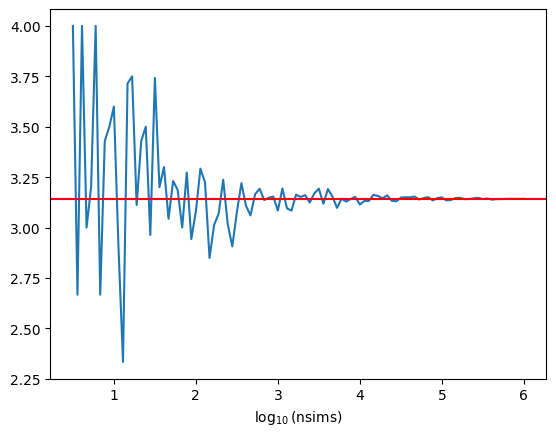

In [162]:
import matplotlib.pyplot as plt
plt.plot(log10_nsims, pi)
plt.axhline(y=np.pi, color='r', linestyle='-') # add red line 
plt.xlabel("$\log_{10}($nsims$)$") # add label with LaTex
plt.show() 